<a href="https://colab.research.google.com/github/Logan-Bz/PHYS3025Work/blob/main/Numerical_Sol_to_Laplace's_Eqn%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numba
from numba import jit


In [ ]:
a = 10 #height of our box (default set to 10)
b = 100*a

edge = np.linspace(0,a,a)

up = np.zeros(b)*0
down = np.zeros(b)*0
left = 1*np.ones(a) #This is out potential on the y-axis, this is V0(y)
right = 0*np.zeros(a) #This is to say that as x goes to inifinity (big), our potential goes to zero
#plt.plot(edge, left)

Here is a plot to show you what our V0 function looks like. Y-values on the horizontal axis and potential values on the vertical axis.

In [ ]:
xv , yv = np.meshgrid(edge, 100*edge)

In [ ]:

#funciton that applies Laplace's Equation numerically

tol = 1e-5 #Tolerance, this is the minimum amount of change you want after some amount of iterations
#tolerance in units of volts


@numba.jit("f8[:,:](f8[:,:],i8)", nopython = True, nogil = True)
def compute_potential(potential , n_iter):
  length = len(potential[0])
  for n in range (n_iter):
    old_potential = np.copy(potential)
    for i in range (1, b-1):
      for j in range (1, a-1):
        potential[j][i] = 0.25*(potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    err = np.max(np.abs(old_potential - potential))
    if err < tol:
      print("The number of iterations to reach your tolerance is:" , n)
      break
  if err >= tol:
    print("You need more iterations to reach your tolerance")
  return potential


In [ ]:
potential = 0.2*np.ones((a,b)) #initial guess is that the potential is 0.2 everywhere

#Boundary conditions:
potential[0,:] = down
potential[-1,:] = up
potential[:,0] = left
potential[:,-1] = right

In [ ]:
# !!!!!! Run above cell before computing potential !!!!
potential = compute_potential(potential, n_iter = 122) #insert the number of iterations for 'n_iter'


The number of iterations to reach your tolerance is: 121


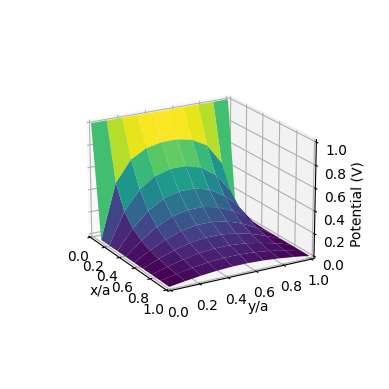

In [ ]:
#plot stuff
xs = xv[0:a,:]
ps = potential[:,0:a]

ax = plt.axes(projection='3d')
ax.plot_surface(xs/a, yv/b, ps, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.view_init(20, -30)
ax.set_box_aspect(aspect=None, zoom=0.7)
ax.margins(0,0,0)

ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
ax.set_zlabel('Potential (V)');